In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv('/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv')

In [5]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
list(df.columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [8]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains:			[0 1 2 4 3 5 7 6 9 8]
AtSymbol contains:			[0 1]
TildeSymbol contains:			[0 1]
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains:			[0 1]
NumNumericChars has 82 unique values
NoHttps contains:			[1 0]
RandomString contains:			[0 1]
IpAddress contains:			[0 1]
DomainInSubdomains contains:			[0 1]
DomainInPaths contains:			[0 1]
HttpsInHostname contains:			[0]
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains:			[0 1]
NumSensitiveWords contains:			[0 1 2 3]
EmbeddedBrandName contains:			[0 1]
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains:

In [11]:
df = df.drop(columns=['id'])

KeyError: "['id'] not found in axis"

Text(0.5, 1.0, 'Phishing vs. Non-Phishing Links')

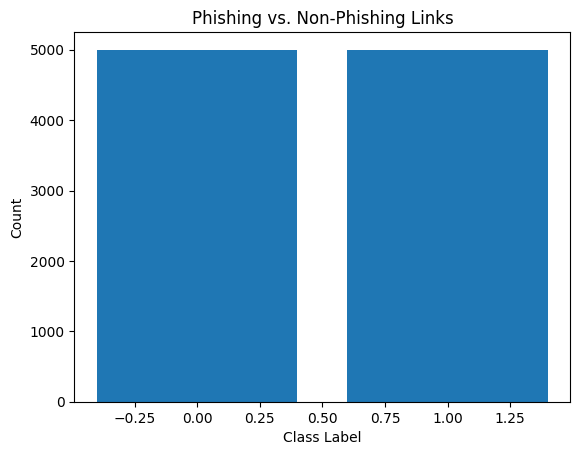

In [12]:
class_counts = df['CLASS_LABEL'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Phishing vs. Non-Phishing Links')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [14]:
target = df['CLASS_LABEL']
features = df.drop(['CLASS_LABEL', 'RelativeFormAction', 'DoubleSlashInPath', 'HttpsInHostname', 'DomainInSubdomains', 'FakeLinkInStatusBar', 'RandomString', 'EmbeddedBrandName', 'AtSymbol', 'ImagesOnlyInForm', 'NumHash', 'AbnormalFormAction', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'PopUpWindow', 'RightClickDisabled', 'IpAddress', 'SubdomainLevelRT', 'TildeSymbol'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
xgb_model = xgb.XGBClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()

In [16]:
# Fitting the models
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [18]:
# Making predictions
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
gnb_pred = gnb_model.predict(X_test)

In [20]:
# Evaluating the models
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [21]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.99
Decision Tree Accuracy: 0.9725
Random Forest Accuracy: 0.9845
Logistic Regression Accuracy: 0.928
Gradient Boosting Accuracy: 0.982
AdaBoost Accuracy: 0.975
SVM Accuracy: 0.8575
KNN Accuracy: 0.8735
GaussianNB Accuracy: 0.8565


In [ ]:
import matplotlib.pyplot as plt

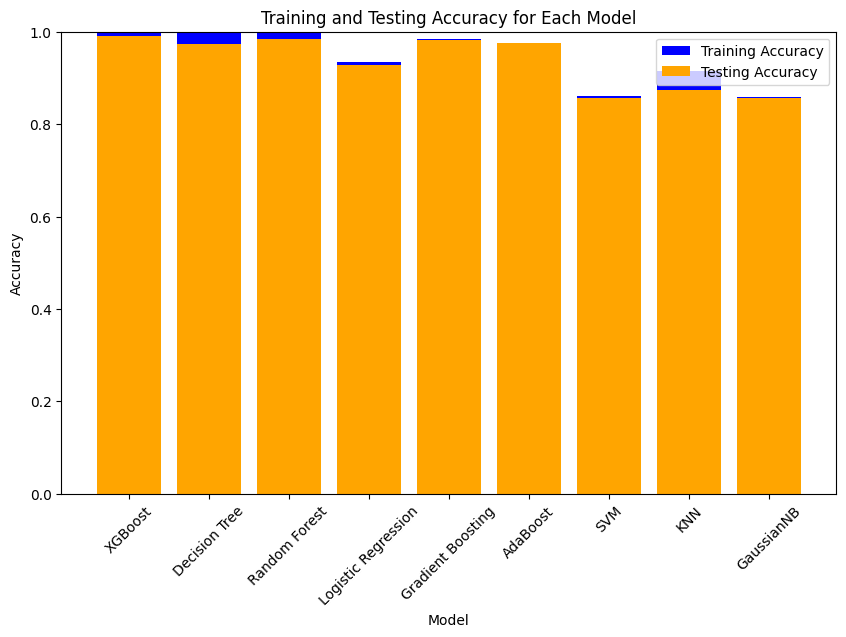

In [22]:
# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB']
train_accuracies = [xgb_model.score(X_train, y_train), dt_model.score(X_train, y_train), rf_model.score(X_train, y_train), lr_model.score(X_train, y_train), gb_model.score(X_train, y_train), ab_model.score(X_train, y_train), svm_model.score(X_train, y_train), knn_model.score(X_train, y_train), gnb_model.score(X_train, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy]

# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='blue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [23]:
import matplotlib.pyplot as plt

# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB']
train_accuracies = [xgb_model.score(X_train, y_train), dt_model.score(X_train, y_train), rf_model.score(X_train, y_train), lr_model.score(X_train, y_train), gb_model.score(X_train, y_train), ab_model.score(X_train, y_train), svm_model.score(X_train, y_train), knn_model.score(X_train, y_train), gnb_model.score(X_train, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy]

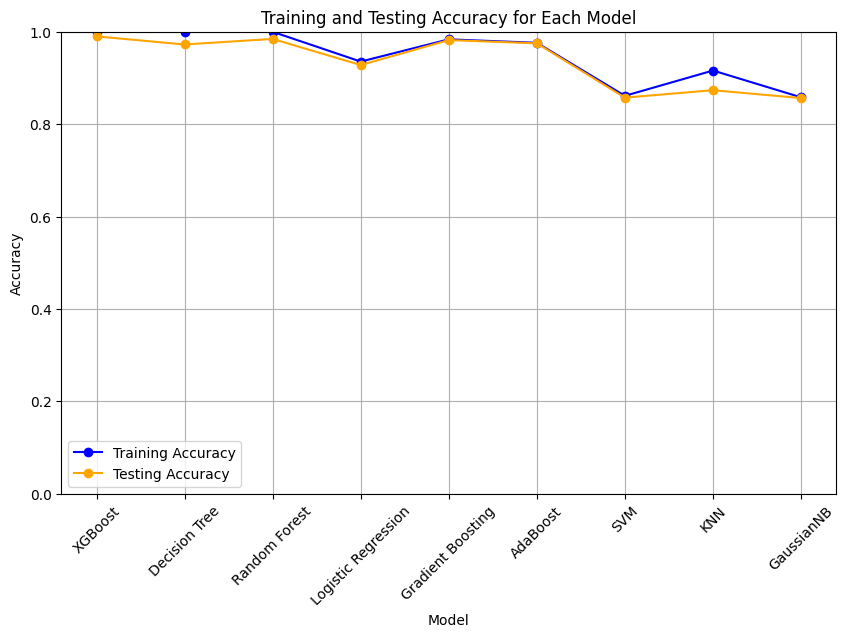

In [24]:
# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(models, test_accuracies, marker='o', linestyle='-', color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Stacking Classifier
estimators = [('xgb', xgb_model), ('dt', dt_model), ('rf', rf_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=lr_model)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Stacking Classifier Accuracy: 0.9895


In [26]:
# Voting Classifier
voting_model = VotingClassifier(estimators=estimators)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.989


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

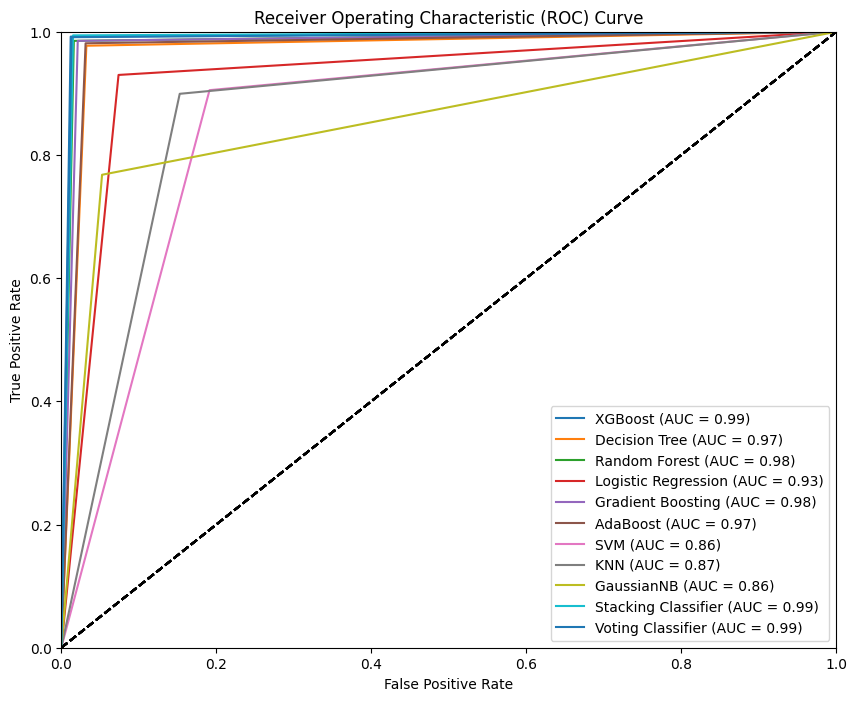

In [31]:
# Define a list of models and their corresponding predictions
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB', 'Stacking Classifier', 'Voting Classifier']
predictions = [xgb_pred, dt_pred, rf_pred, lr_pred, gb_pred, ab_pred, svm_pred, knn_pred, gnb_pred, stacking_pred, voting_pred]

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model, prediction in zip(models, predictions):
    fpr, tpr, _ = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    plt.plot(fpr, tpr, label=model + ' (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Print confusion matrix report for each model
for model, prediction in zip(models, predictions):
    cm = confusion_matrix(y_test, prediction)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    print("Model:", model)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("------------------------------")

Model: XGBoost
Confusion Matrix:
[[ 976   12]
 [   8 1004]]
Accuracy: 0.99
Precision: 0.9881889763779528
Recall: 0.9920948616600791
F1 Score: 0.990138067061144
------------------------------
Model: Decision Tree
Confusion Matrix:
[[956  32]
 [ 23 989]]
Accuracy: 0.9725
Precision: 0.9686581782566112
Recall: 0.9772727272727273
F1 Score: 0.9729463846532218
------------------------------
Model: Random Forest
Confusion Matrix:
[[972  16]
 [ 15 997]]
Accuracy: 0.9845
Precision: 0.9842053307008884
Recall: 0.9851778656126482
F1 Score: 0.9846913580246914
------------------------------
Model: Logistic Regression
Confusion Matrix:
[[915  73]
 [ 71 941]]
Accuracy: 0.928
Precision: 0.928007889546351
Recall: 0.9298418972332015
F1 Score: 0.9289239881539981
------------------------------
Model: Gradient Boosting
Confusion Matrix:
[[967  21]
 [ 15 997]]
Accuracy: 0.982
Precision: 0.9793713163064833
Recall: 0.9851778656126482
F1 Score: 0.9822660098522167
------------------------------
Model: AdaBoost
Co

In [34]:
df.to_csv('output.csv', index=False)